In [1]:
import os
import json
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/mantydze/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Feature description

feature_names = ['qPFJetPt', 'qPFJetEta', 'qPFJetPhi', 'qPFJet0Pt', 'qPFJet1Pt', 'qPFJet2Pt', 'qPFJet3Pt', 'qPFJet4Pt', 'qPFJet5Pt', 'qPFJet0Eta', 'qPFJet1Eta', 'qPFJet2Eta', 'qPFJet3Eta', 'qPFJet4Eta', 'qPFJet5Eta', 'qPFJet0Phi', 'qPFJet1Phi', 'qPFJet2Phi', 'qPFJet3Phi', 'qPFJet4Phi', 'qPFJet5Phi', 'qPFJet4CHS0Pt', 'qPFJet4CHS1Pt', 'qPFJet4CHS2Pt', 'qPFJet4CHS3Pt', 'qPFJet4CHS4Pt', 'qPFJet4CHS5Pt', 'qPFJet4CHS0Eta', 'qPFJet4CHS1Eta', 'qPFJet4CHS2Eta', 'qPFJet4CHS3Eta', 'qPFJet4CHS4Eta', 'qPFJet4CHS5Eta', 'qPFJet4CHS0Phi', 'qPFJet4CHS1Phi', 'qPFJet4CHS2Phi', 'qPFJet4CHS3Phi', 'qPFJet4CHS4Phi', 'qPFJet4CHS5Phi', 'qPFJet8CHS0Pt', 'qPFJet8CHS1Pt', 'qPFJet8CHS2Pt', 'qPFJet8CHS3Pt', 'qPFJet8CHS4Pt', 'qPFJet8CHS5Pt', 'qPFJet8CHS0Eta', 'qPFJet8CHS1Eta', 'qPFJet8CHS2Eta', 'qPFJet8CHS3Eta', 'qPFJet8CHS4Eta', 'qPFJet8CHS5Eta', 'qPFJet8CHS0Phi', 'qPFJet8CHS1Phi', 'qPFJet8CHS2Phi', 'qPFJet8CHS3Phi', 'qPFJet8CHS4Phi', 'qPFJet8CHS5Phi', 'qPFJetEI0Pt', 'qPFJetEI1Pt', 'qPFJetEI2Pt', 'qPFJetEI3Pt', 'qPFJetEI4Pt', 'qPFJetEI5Pt', 'qPFJetEI0Eta', 'qPFJetEI1Eta', 'qPFJetEI2Eta', 'qPFJetEI3Eta', 'qPFJetEI4Eta', 'qPFJetEI5Eta', 'qPFJetEI0Phi', 'qPFJetEI1Phi', 'qPFJetEI2Phi', 'qPFJetEI3Phi', 'qPFJetEI4Phi', 'qPFJetEI5Phi', 'qPFJet8CHSSD0Pt', 'qPFJet8CHSSD1Pt', 'qPFJet8CHSSD2Pt', 'qPFJet8CHSSD3Pt', 'qPFJet8CHSSD4Pt', 'qPFJet8CHSSD5Pt', 'qPFJet8CHSSD0Eta', 'qPFJet8CHSSD1Eta', 'qPFJet8CHSSD2Eta', 'qPFJet8CHSSD3Eta', 'qPFJet8CHSSD4Eta', 'qPFJet8CHSSD5Eta', 'qPFJet8CHSSD0Phi', 'qPFJet8CHSSD1Phi', 'qPFJet8CHSSD2Phi', 'qPFJet8CHSSD3Phi', 'qPFJet8CHSSD4Phi', 'qPFJet8CHSSD5Phi', 'qPFJetTopCHS0Pt', 'qPFJetTopCHS1Pt', 'qPFJetTopCHS2Pt', 'qPFJetTopCHS3Pt', 'qPFJetTopCHS4Pt', 'qPFJetTopCHS5Pt', 'qPFJetTopCHS0Eta', 'qPFJetTopCHS1Eta', 'qPFJetTopCHS2Eta', 'qPFJetTopCHS3Eta', 'qPFJetTopCHS4Eta', 'qPFJetTopCHS5Eta', 'qPFJetTopCHS0Phi', 'qPFJetTopCHS1Phi', 'qPFJetTopCHS2Phi', 'qPFJetTopCHS3Phi', 'qPFJetTopCHS4Phi', 'qPFJetTopCHS5Phi', 'qCalJet0Pt', 'qCalJet1Pt', 'qCalJet2Pt', 'qCalJet3Pt', 'qCalJet4Pt', 'qCalJet5Pt', 'qCalJet0Eta', 'qCalJet1Eta', 'qCalJet2Eta', 'qCalJet3Eta', 'qCalJet4Eta', 'qCalJet5Eta', 'qCalJet0Phi', 'qCalJet1Phi', 'qCalJet2Phi', 'qCalJet3Phi', 'qCalJet4Phi', 'qCalJet5Phi', 'qCalJet0En', 'qCalJet1En', 'qCalJet2En', 'qCalJet3En', 'qCalJet4En', 'qCalJet5En', 'qPho0Pt', 'qPho1Pt', 'qPho2Pt', 'qPho3Pt', 'qPho4Pt', 'qPho5Pt', 'qPho0Eta', 'qPho1Eta', 'qPho2Eta', 'qPho3Eta', 'qPho4Eta', 'qPho5Eta', 'qPho0Phi', 'qPho1Phi', 'qPho2Phi', 'qPho3Phi', 'qPho4Phi', 'qPho5Phi', 'qPho0En', 'qPho1En', 'qPho2En', 'qPho3En', 'qPho4En', 'qPho5En', 'qgedPho0Pt', 'qgedPho1Pt', 'qgedPho2Pt', 'qgedPho3Pt', 'qgedPho4Pt', 'qgedPho5Pt', 'qgedPho0Eta', 'qgedPho1Eta', 'qgedPho2Eta', 'qgedPho3Eta', 'qgedPho4Eta', 'qgedPho5Eta', 'qgedPho0Phi', 'qgedPho1Phi', 'qgedPho2Phi', 'qgedPho3Phi', 'qgedPho4Phi', 'qgedPho5Phi', 'qgedPho0En', 'qgedPho1En', 'qgedPho2En', 'qgedPho3En', 'qgedPho4En', 'qgedPho5En', 'qMu0Pt', 'qMu1Pt', 'qMu2Pt', 'qMu3Pt', 'qMu4Pt', 'qMu5Pt', 'qMu0Eta', 'qMu1Eta', 'qMu2Eta', 'qMu3Eta', 'qMu4Eta', 'qMu5Eta', 'qMu0Phi', 'qMu1Phi', 'qMu2Phi', 'qMu3Phi', 'qMu4Phi', 'qMu5Phi', 'qMu0En', 'qMu1En', 'qMu2En', 'qMu3En', 'qMu4En', 'qMu5En', 'qMuCosm0Pt', 'qMuCosm1Pt', 'qMuCosm2Pt', 'qMuCosm3Pt', 'qMuCosm4Pt', 'qMuCosm5Pt', 'qMuCosm0Eta', 'qMuCosm1Eta', 'qMuCosm2Eta', 'qMuCosm3Eta', 'qMuCosm4Eta', 'qMuCosm5Eta', 'qMuCosm0Phi', 'qMuCosm1Phi', 'qMuCosm2Phi', 'qMuCosm3Phi', 'qMuCosm4Phi', 'qMuCosm5Phi', 'qMuCosm0En', 'qMuCosm1En', 'qMuCosm2En', 'qMuCosm3En', 'qMuCosm4En', 'qMuCosm5En', 'qMuCosmLeg0Pt', 'qMuCosmLeg1Pt', 'qMuCosmLeg2Pt', 'qMuCosmLeg3Pt', 'qMuCosmLeg4Pt', 'qMuCosmLeg5Pt', 'qMuCosmLeg0Eta', 'qMuCosmLeg1Eta', 'qMuCosmLeg2Eta', 'qMuCosmLeg3Eta', 'qMuCosmLeg4Eta', 'qMuCosmLeg5Eta', 'qMuCosmLeg0Phi', 'qMuCosmLeg1Phi', 'qMuCosmLeg2Phi', 'qMuCosmLeg3Phi', 'qMuCosmLeg4Phi', 'qMuCosmLeg5Phi', 'qMuCosmLeg0En', 'qMuCosmLeg1En', 'qMuCosmLeg2En', 'qMuCosmLeg3En', 'qMuCosmLeg4En', 'qMuCosmLeg5En', 'qPFJet4CHSPt', 'qPFJet4CHSEta', 'qPFJet4CHSPhi', 'qPFJet8CHSPt', 'qPFJet8CHSEta', 'qPFJet8CHSPhi', 'qPFJetEIPt', 'qPFJetEIEta', 'qPFJetEIPhi', 'qPFJet8CHSSDPt', 'qPFJet8CHSSDEta', 'qPFJet8CHSSDPhi', 'qPFJetTopCHSPt', 'qPFJetTopCHSEta', 'qPFJetTopCHSPhi', 'qPFChMetPt', 'qPFChMetPhi', 'qPFMetPt', 'qPFMetPhi', 'qNVtx', 'qCalJetPt', 'qCalJetEta', 'qCalJetPhi', 'qCalJetEn', 'qCalMETPt', 'qCalMETPhi', 'qCalMETEn', 'qCalMETBEPt', 'qCalMETBEPhi', 'qCalMETBEEn', 'qCalMETBEFOPt', 'qCalMETBEFOPhi', 'qCalMETBEFOEn', 'qCalMETMPt', 'qCalMETMPhi', 'qCalMETMEn', 'qSCEn', 'qSCEta', 'qSCPhi', 'qSCEtaWidth', 'qSCPhiWidth', 'qSCEnhfEM', 'qSCEtahfEM', 'qSCPhihfEM', 'qSCEn5x5', 'qSCEta5x5', 'qSCPhi5x5', 'qSCEtaWidth5x5', 'qSCPhiWidth5x5', 'qCCEn', 'qCCEta', 'qCCPhi', 'qCCEn5x5', 'qCCEta5x5', 'qCCPhi5x5', 'qPhoPt', 'qPhoEta', 'qPhoPhi', 'qPhoEn_', 'qPhoe1x5_', 'qPhoe2x5_', 'qPhoe3x3_', 'qPhoe5x5_', 'qPhomaxenxtal_', 'qPhosigmaeta_', 'qPhosigmaIeta_', 'qPhor1x5_', 'qPhor2x5_', 'qPhor9_', 'qgedPhoPt', 'qgedPhoEta', 'qgedPhoPhi', 'qgedPhoEn_', 'qgedPhoe1x5_', 'qgedPhoe2x5_', 'qgedPhoe3x3_', 'qgedPhoe5x5_', 'qgedPhomaxenxtal_', 'qgedPhosigmaeta_', 'qgedPhosigmaIeta_', 'qgedPhor1x5_', 'qgedPhor2x5_', 'qgedPhor9_', 'qMuPt', 'qMuEta', 'qMuPhi', 'qMuEn_', 'qMuCh_', 'qMuChi2_', 'qMuCosmPt', 'qMuCosmEta', 'qMuCosmPhi', 'qMuCosmEn_', 'qMuCosmCh_', 'qMuCosmChi2_', 'qMuCosmLegPt', 'qMuCosmLegEta', 'qMuCosmLegPhi', 'qMuCosmLegEn_', 'qMuCosmLegCh_', 'qMuCosmLegChi2_', 'qSigmaIEta', 'qSigmaIPhi', 'qr9', 'qHadOEm', 'qdrSumPt', 'qdrSumEt', 'qeSCOP', 'qecEn', 'qUNSigmaIEta', 'qUNSigmaIPhi', 'qUNr9', 'qUNHadOEm', 'qUNdrSumPt', 'qUNdrSumEt', 'qUNeSCOP', 'qUNecEn', 'qEBenergy', 'qEBtime', 'qEBchi2', 'qEBiEta', 'qEBiPhi', 'qEEenergy', 'qEEtime', 'qEEchi2', 'qEEix', 'qEEiy', 'qESenergy', 'qEStime', 'qESix', 'qESiy', 'qHBHEenergy', 'qHBHEtime', 'qHBHEauxe', 'qHBHEieta', 'qHBHEiphi', 'qHFenergy', 'qHFtime', 'qHFieta', 'qHFiphi', 'qPreShEn', 'qPreShEta', 'qPreShPhi', 'qPreShYEn', 'qPreShYEta', 'qPreShYPhi']

feature_positions = ["MEAN", "RMS", "Q1", "Q2", "Q3", "Q4", "Q5"]

parameters = ["%s_%s" % (name, position) for name in feature_names for position in feature_positions]

print("Number of feature vectors: %d" % len(feature_names))

Number of feature vectors: 401


In [3]:
dset_names = ["JetHT2016", "SingleMuon2016", "ZeroBias2016", "SinglePhoton2016"]

dset_basepath = "/home/mantydze/data/{dset_name}/single/{dset_name}.h5"

In [4]:
dset_stats = {}

for dset_name in dset_names:
    dset_stats[dset_name] = []
    
    # Read dataset
    dset_path = dset_basepath.format(dset_name=dset_name)
    print(dset_path)
    
    with h5py.File(dset_path, "r") as f:
        dset = f[dset_name][:]
    
    # calculate parameter variance
    X = dset[:, :2807]
    variances = np.var(X, axis=0)
    indices = np.argsort(variances)[::-1]
    
    # Create intermediate statistics for each feature
    for index in indices:
        variance = variances[index]

        feature, position = divmod(index, 7) # integer and remainder

        dset_stats[dset_name].append({
            "index": index,
            "name": feature_names[feature],
            "position": feature_positions[position],
            "variance": variance,
            "value": dset[0, index] if variance == 0.0 else None
        })
        

/home/mantydze/data/JetHT2016/single/JetHT2016.h5
/home/mantydze/data/SingleMuon2016/single/SingleMuon2016.h5
/home/mantydze/data/ZeroBias2016/single/ZeroBias2016.h5
/home/mantydze/data/SinglePhoton2016/single/SinglePhoton2016.h5


In [5]:
def default(o):
    if isinstance(o, np.integer): return int(o)
    raise TypeError

# dump statistics to file
with open("dset_stats.json", "w") as f:
    json.dump(dset_stats, f, indent=4, default=default)

# Zero variance

In [6]:
zvs = []
print("# of parameters with zero variance, Dataset")    

for dset_name in dset_stats.keys():    
    zv = set([s["index"] for s in dset_stats[dset_name] if s["variance"] == 0.0])
    zvs.append(zv)
    print(len(zv), dset_name)

# of parameters with zero variance, Dataset
325 JetHT2016
478 SingleMuon2016
585 ZeroBias2016
355 SinglePhoton2016


In [7]:
# list of indexes of parameters with zero variance across all datasets
zv_all = set.intersection(*zvs)

In [8]:
for index in sorted(zv_all):
    print(index, parameters[index])

289 qPFJet8CHS2Pt_Q1
296 qPFJet8CHS3Pt_Q1
303 qPFJet8CHS4Pt_Q1
310 qPFJet8CHS5Pt_Q1
354 qPFJet8CHS5Eta_Q3
396 qPFJet8CHS5Phi_Q3
527 qPFJet8CHSSD0Pt_Q1
534 qPFJet8CHSSD1Pt_Q1
541 qPFJet8CHSSD2Pt_Q1
548 qPFJet8CHSSD3Pt_Q1
555 qPFJet8CHSSD4Pt_Q1
556 qPFJet8CHSSD4Pt_Q2
562 qPFJet8CHSSD5Pt_Q1
563 qPFJet8CHSSD5Pt_Q2
599 qPFJet8CHSSD4Eta_Q3
606 qPFJet8CHSSD5Eta_Q3
641 qPFJet8CHSSD4Phi_Q3
648 qPFJet8CHSSD5Phi_Q3
653 qPFJetTopCHS0Pt_Q1
660 qPFJetTopCHS1Pt_Q1
667 qPFJetTopCHS2Pt_Q1
674 qPFJetTopCHS3Pt_Q1
681 qPFJetTopCHS4Pt_Q1
682 qPFJetTopCHS4Pt_Q2
688 qPFJetTopCHS5Pt_Q1
689 qPFJetTopCHS5Pt_Q2
718 qPFJetTopCHS3Eta_Q3
725 qPFJetTopCHS4Eta_Q3
732 qPFJetTopCHS5Eta_Q3
760 qPFJetTopCHS3Phi_Q3
767 qPFJetTopCHS4Phi_Q3
774 qPFJetTopCHS5Phi_Q3
954 qPho1Pt_Q1
961 qPho2Pt_Q1
962 qPho2Pt_Q2
968 qPho3Pt_Q1
969 qPho3Pt_Q2
975 qPho4Pt_Q1
976 qPho4Pt_Q2
977 qPho4Pt_Q3
982 qPho5Pt_Q1
983 qPho5Pt_Q2
984 qPho5Pt_Q3
1005 qPho2Eta_Q3
1012 qPho3Eta_Q3
1018 qPho4Eta_Q2
1019 qPho4Eta_Q3
1020 qPho4Eta_Q4
1025 qPho5Eta_

# Variance per dataset

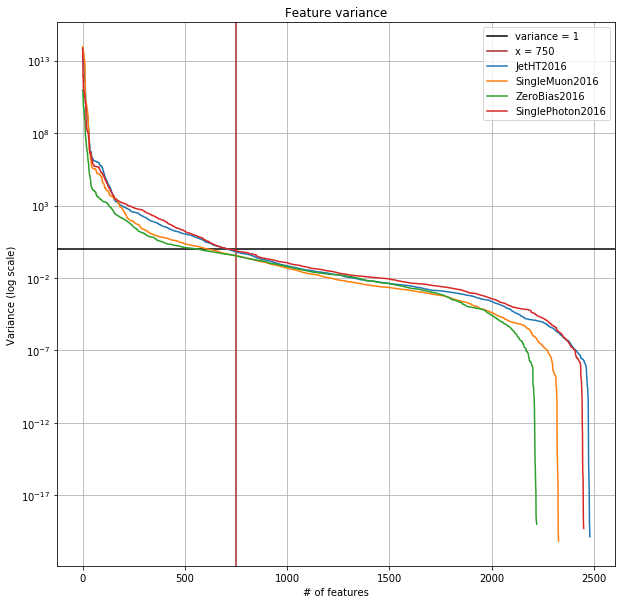

In [9]:
plt.figure(figsize=(10,10))
plt.grid()
plt.title("Feature variance")
plt.ylabel("Variance (log scale)")
plt.xlabel("# of features")
plt.yscale("log")
plt.axhline(y=1, c="black", label="variance = 1")
plt.axvline(x=750, c="brown", label="x = 750")


for dset_name in dset_stats.keys():    
    variance = [s["variance"] for s in dset_stats[dset_name] if s["variance"] > 0]
    plt.plot(range(0, len(variance)), variance, label=dset_name)
    
plt.legend()
plt.show()

# Top 25 features from JetHT2016 with highest variance

In [10]:
with pd.option_context('display.max_rows', None):
    print(pd.DataFrame(dset_stats["JetHT2016"][:25]))

    index           name position value      variance
0    2393         qMuEn_       Q5  None  1.783834e+13
1    1413         qMu0En       Q5  None  1.716167e+13
2    1581     qMuCosm0En       Q5  None  1.007447e+13
3    2435     qMuCosmEn_       Q5  None  1.007447e+13
4    1455     qMuCosm0Pt       Q5  None  7.949787e+12
5    2414      qMuCosmPt       Q5  None  7.949787e+12
6    1749  qMuCosmLeg0En       Q5  None  6.293527e+12
7    2477  qMuCosmLegEn_       Q5  None  6.293527e+12
8    2372          qMuPt       Q5  None  4.290123e+12
9    1287         qMu0Pt       Q5  None  4.290123e+12
10   1420         qMu1En       Q5  None  6.048091e+11
11   1623  qMuCosmLeg0Pt       Q5  None  3.398039e+11
12   2456   qMuCosmLegPt       Q5  None  3.398039e+11
13   2526       qdrSumPt       Q5  None  3.360109e+11
14   1441         qMu4En       Q5  None  5.973530e+10
15   2472  qMuCosmLegEn_      RMS  None  1.096230e+10
16   1408         qMu0En      RMS  None  6.215867e+09
17   2430     qMuCosmEn_    

# Top 25 features from SingleMuon2016 with highest variance

In [11]:
with pd.option_context('display.max_rows', None):
    print(pd.DataFrame(dset_stats["SingleMuon2016"][:25]))

    index           name position value      variance
0    2393         qMuEn_       Q5  None  8.798710e+13
1    1413         qMu0En       Q5  None  8.783041e+13
2    1581     qMuCosm0En       Q5  None  5.349234e+13
3    2435     qMuCosmEn_       Q5  None  5.349234e+13
4    1749  qMuCosmLeg0En       Q5  None  3.557017e+13
5    2477  qMuCosmLegEn_       Q5  None  3.557017e+13
6    2456   qMuCosmLegPt       Q5  None  2.315181e+13
7    1623  qMuCosmLeg0Pt       Q5  None  2.315181e+13
8    1455     qMuCosm0Pt       Q5  None  1.266540e+13
9    2414      qMuCosmPt       Q5  None  1.266540e+13
10   2372          qMuPt       Q5  None  7.300610e+12
11   1287         qMu0Pt       Q5  None  7.300610e+12
12   2526       qdrSumPt       Q5  None  1.979737e+12
13   1448         qMu5En       Q5  None  1.135736e+11
14   1408         qMu0En      RMS  None  2.490583e+10
15   2472  qMuCosmLegEn_      RMS  None  1.634745e+10
16   1576     qMuCosm0En      RMS  None  1.498170e+10
17   1420         qMu1En    

# Top 25 features from SinglePhoton2016 with highest variance

In [12]:
with pd.option_context('display.max_rows', None):
    print(pd.DataFrame(dset_stats["SinglePhoton2016"][:25]))

    index           name position value      variance
0    2393         qMuEn_       Q5  None  7.191809e+13
1    1413         qMu0En       Q5  None  7.183112e+13
2    1287         qMu0Pt       Q5  None  8.381953e+11
3    2372          qMuPt       Q5  None  8.381953e+11
4    1581     qMuCosm0En       Q5  None  1.290787e+11
5    2435     qMuCosmEn_       Q5  None  1.290787e+11
6    1408         qMu0En      RMS  None  8.242113e+10
7    1441         qMu4En       Q5  None  7.945259e+10
8    1455     qMuCosm0Pt       Q5  None  5.334934e+10
9    2414      qMuCosmPt       Q5  None  5.334934e+10
10   2526       qdrSumPt       Q5  None  4.654887e+10
11   1749  qMuCosmLeg0En       Q5  None  3.334029e+10
12   2477  qMuCosmLegEn_       Q5  None  3.334028e+10
13   2388         qMuEn_      RMS  None  1.716939e+10
14   1623  qMuCosmLeg0Pt       Q5  None  1.110090e+10
15   2456   qMuCosmLegPt       Q5  None  1.110090e+10
16   1448         qMu5En       Q5  None  6.762606e+09
17   1282         qMu0Pt    

# Top 25 features from ZeroBias2016 with highest variance

In [13]:
with pd.option_context('display.max_rows', None):
    print(pd.DataFrame(dset_stats["ZeroBias2016"][:25]))

    index           name position value      variance
0    2393         qMuEn_       Q5  None  9.172261e+10
1    1413         qMu0En       Q5  None  9.098319e+10
2    1287         qMu0Pt       Q5  None  3.680330e+10
3    2372          qMuPt       Q5  None  3.680330e+10
4    1581     qMuCosm0En       Q5  None  6.391311e+09
5    2435     qMuCosmEn_       Q5  None  6.391310e+09
6    1749  qMuCosmLeg0En       Q5  None  4.625673e+09
7    2477  qMuCosmLegEn_       Q5  None  4.625672e+09
8    1623  qMuCosmLeg0Pt       Q5  None  1.816241e+09
9    2456   qMuCosmLegPt       Q5  None  1.816241e+09
10   2414      qMuCosmPt       Q5  None  9.206894e+08
11   1455     qMuCosm0Pt       Q5  None  9.206894e+08
12   1420         qMu1En       Q5  None  6.502979e+08
13   1408         qMu0En      RMS  None  1.437841e+08
14   1441         qMu4En       Q5  None  6.763914e+07
15   1282         qMu0Pt      RMS  None  5.281774e+07
16   2472  qMuCosmLegEn_      RMS  None  3.592041e+07
17   2388         qMuEn_    